In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='******',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_fb15k')

In [3]:
entity = psql.read_sql("""SELECT DISTINCT subject FROM train UNION SELECT DISTINCT object FROM train
                          UNION SELECT DISTINCT subject FROM valid UNION SELECT DISTINCT object FROM valid
                          UNION SELECT DISTINCT subject FROM test UNION SELECT DISTINCT object FROM test
                        """, connection)
entity.head()

,subject
0,/m/0bw87
1,/m/0cp9f9
2,/m/07k2mq
3,/m/022_lg
4,/m/026ldz7


In [4]:
entity.count()

subject    14951
dtype: int64

In [5]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
subject,14951


In [6]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,subject,14951


In [7]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,subject,14951


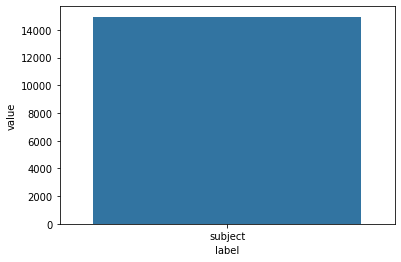

In [8]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [9]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,4094,/finance/currency/countries_used
1,4095,/aviation/airport/focus_city_for
2,4096,/basketball/basketball_position/player_roster_...
3,4097,/visual_art/art_period_movement/associated_art...
4,4098,/base/bioventurist/science_or_technology_compa...


In [10]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,1345
name,1345


In [11]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,1345
1,name,1345


In [12]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,1345
1,name,1345


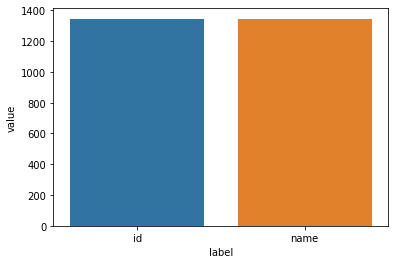

In [13]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [14]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,predicate,object
0,1,/m/01qscs,/award/award nominee/award nominations./award/...,/m/02x8n1n
1,1,/m/027rn,/location/country/form of government,/m/06cx9
2,1,/m/07pd_j,/film/film/genre,/m/02l7c8
3,2,/m/017dcd,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0
4,2,/m/040db,/base/activism/activist/area of activism,/m/0148d


In [15]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,592213
subject,592213
predicate,592213
object,592213


In [16]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,592213
1,subject,592213
2,predicate,592213
3,object,592213


In [17]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts

,label,value
0,id,592213
1,subject,592213
2,predicate,592213
3,object,592213


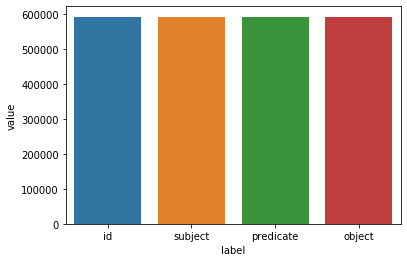

In [18]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [19]:
triple_counts.loc[0, 'value']

592213

In [20]:
triple_count = pd.Series({'triple': triple_counts.loc[0, 'value']})
entity_count = pd.Series({'entity': entity_counts.loc[0, 'value']})
relation_count = pd.Series({'relation': relation_counts.loc[0, 'value']})

triple_entity_relation_counts = pd.DataFrame([triple_count, entity_count, relation_count])
triple_entity_relation_counts.head()

,triple,entity,relation
0,592213.0,NaN,NaN
1,NaN,14951.0,NaN
2,NaN,NaN,1345.0


In [21]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,592213
entity,14951
relation,1345


In [22]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,592213
1,entity,14951
2,relation,1345


In [23]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,592213
1,entity,14951
2,relation,1345


In [45]:
tmp = triple_entity_relation_counts.iloc[0]
triple_entity_relation_counts.iloc[0] = triple_entity_relation_counts.iloc[1]
triple_entity_relation_counts.iloc[1] = triple_entity_relation_counts.iloc[2]
triple_entity_relation_counts.iloc[2] = tmp
triple_entity_relation_counts

,label,value
0,entity,14951
1,relation,1345
2,triple,592213


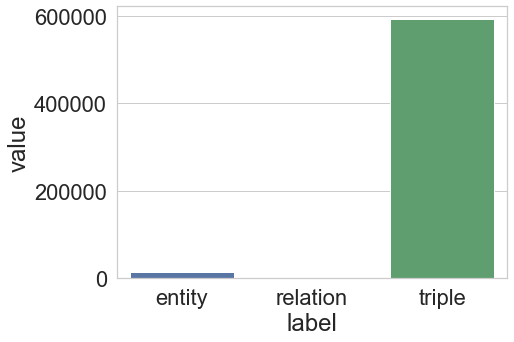

In [51]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid", font_scale=2) 
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)
plt.savefig('FB15k_Counts.png', bbox_inches = "tight", format='PNG')

In [54]:
fact = psql.read_sql("SELECT * FROM fact_train UNION SELECT * FROM fact_valid UNION SELECT * FROM fact_test", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,1,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
2,1,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
3,2,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
4,2,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism


In [55]:
fact = fact.set_index('id')
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
1,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
1,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
2,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
2,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism


In [56]:
predicate_counts = fact['predicate'].value_counts(dropna=False)
predicate_counts.head(50)

/award/award nominee/award nominations./award/award nomination/award nominee                       19764
/film/film/release date s./film/film regional release date/film release region                     15837
/award/award nominee/award nominations./award/award nomination/award                               14921
/award/award category/nominees./award/award nomination/award nominee                               14921
/people/profession/people with this profession                                                     14220
/people/person/profession                                                                          14220
/film/actor/film./film/performance/film                                                            11638
/film/film/starring./film/performance/actor                                                        11638
/award/award nominated work/award nominations./award/award nomination/award                        11594
/award/award category/nominees./award/award nomination/

In [57]:
predicate_counts.index

Index(['/award/award nominee/award nominations./award/award nomination/award nominee',
       '/film/film/release date s./film/film regional release date/film release region',
       '/award/award nominee/award nominations./award/award nomination/award',
       '/award/award category/nominees./award/award nomination/award nominee',
       '/people/profession/people with this profession',
       '/people/person/profession', '/film/actor/film./film/performance/film',
       '/film/film/starring./film/performance/actor',
       '/award/award nominated work/award nominations./award/award nomination/award',
       '/award/award category/nominees./award/award nomination/nominated for',
       ...
       '/comic books/comic book series/created by',
       '/base/petbreeds/dog breed/color',
       '/base/collectives/collective member/member of./base/collectives/collective membership/collective',
       '/ice hockey/hockey player/current team./sports/sports team roster/position',
       '/base/

In [58]:
predicate_counts = predicate_counts.reset_index()
predicate_counts.head(50)

,index,predicate
0,/award/award nominee/award nominations./award/...,19764
1,/film/film/release date s./film/film regional ...,15837
2,/award/award nominee/award nominations./award/...,14921
3,/award/award category/nominees./award/award no...,14921
4,/people/profession/people with this profession,14220
5,/people/person/profession,14220
6,/film/actor/film./film/performance/film,11638
7,/film/film/starring./film/performance/actor,11638
8,/award/award nominated work/award nominations....,11594
9,/award/award category/nominees./award/award no...,11594


In [59]:
predicate_counts = predicate_counts.rename(columns={'index': 'label', 'predicate': 'value'})
predicate_counts.head()

,label,value
0,/award/award nominee/award nominations./award/...,19764
1,/film/film/release date s./film/film regional ...,15837
2,/award/award nominee/award nominations./award/...,14921
3,/award/award category/nominees./award/award no...,14921
4,/people/profession/people with this profession,14220


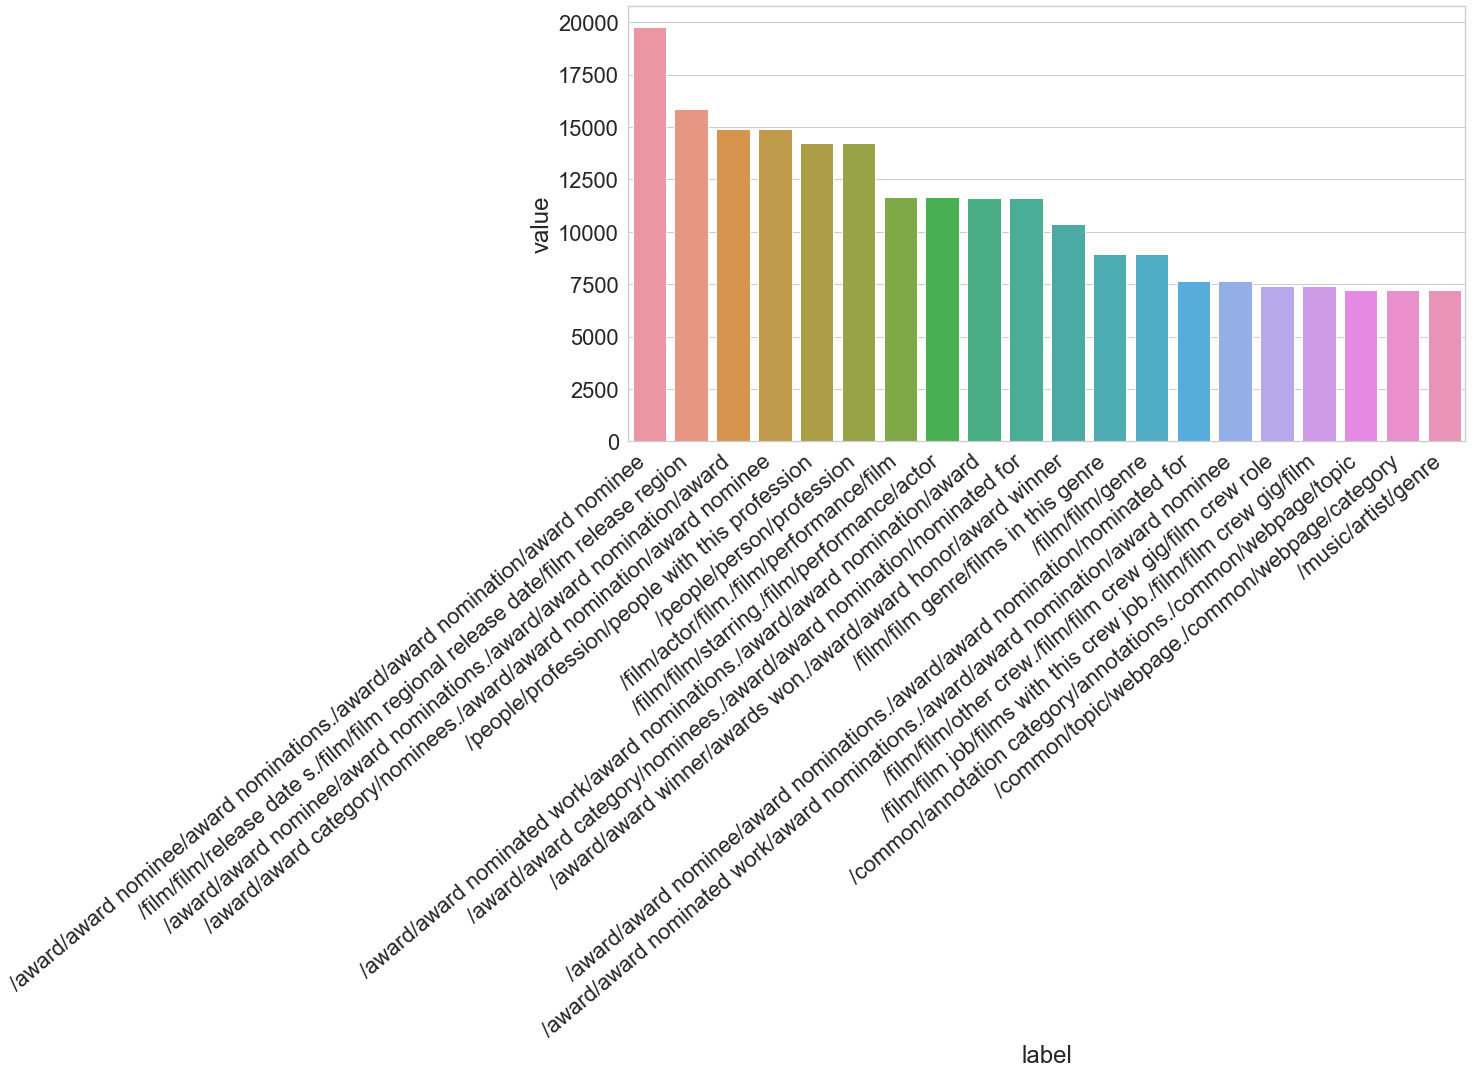

In [61]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid", font_scale=2) 
ax = sns.barplot(x="label", y="value", data=predicate_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('FB15k_Predicate_Counts.png', bbox_inches = "tight", format='PNG')

In [62]:
predicate_counts.count(), predicate_counts.max(), predicate_counts.min(), predicate_counts.median()

(label    1345
 value    1345
 dtype: int64, label    /visual art/visual artist/associated periods o...
 value                                                19764
 dtype: object, label    /american football/football coach position/coa...
 value                                                    1
 dtype: object, value    26.0
 dtype: float64)

In [63]:
# Computing IQR
Q1 = predicate_counts.quantile(0.25)
Q3 = predicate_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    166.0
dtype: float64

In [64]:
object_counts = fact['o_name'].value_counts(dropna=False).to_frame()
object_counts.head()

,o_name
United States,9645
United States dollar,7810
United States Department of Housing and Urban Development,4844
/m/08mbj5d,4384
Male,3643


In [65]:
fact.groupby(['object']).head()

,subject,s_name,predicate,object,o_name
id,,,,,
1,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
1,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
2,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
2,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism
...,...,...,...,...,...
482566,/m/05fly,New South Wales,/government/governmental jurisdiction/governin...,/m/02s0mt,New South Wales Legislative Assembly
482620,/m/019mlh,Shipbuilding,/business/industry/companies,/m/0974y,General Dynamics Electric Boat
482860,/m/08mbj32,/m/08mbj32,/common/annotation category/annotations./commo...,/m/05cxb38,/m/05cxb38


In [66]:
object_counts.index

Index(['United States', 'United States dollar',
       'United States Department of Housing and Urban Development',
       '/m/08mbj5d', 'Male', 'English language', 'Marriage',
       'Forward (association football)', 'Midfielder',
       'Defender (association football)',
       ...
       'Mathcore', 'Lasker-DeBakey Clinical Medical Research Award', 'Warlord',
       'Folk music of Ireland', 'Music video', 'Immortality',
       'Limited company', 'GNU Lesser General Public License',
       'Indonesian cuisine', 'Waffen-SS'],
      dtype='object', length=14930)

In [67]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,United States,9645
1,United States dollar,7810
2,United States Department of Housing and Urban ...,4844
3,/m/08mbj5d,4384
4,Male,3643


In [68]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,United States,9645
1,United States dollar,7810
2,United States Department of Housing and Urban ...,4844
3,/m/08mbj5d,4384
4,Male,3643


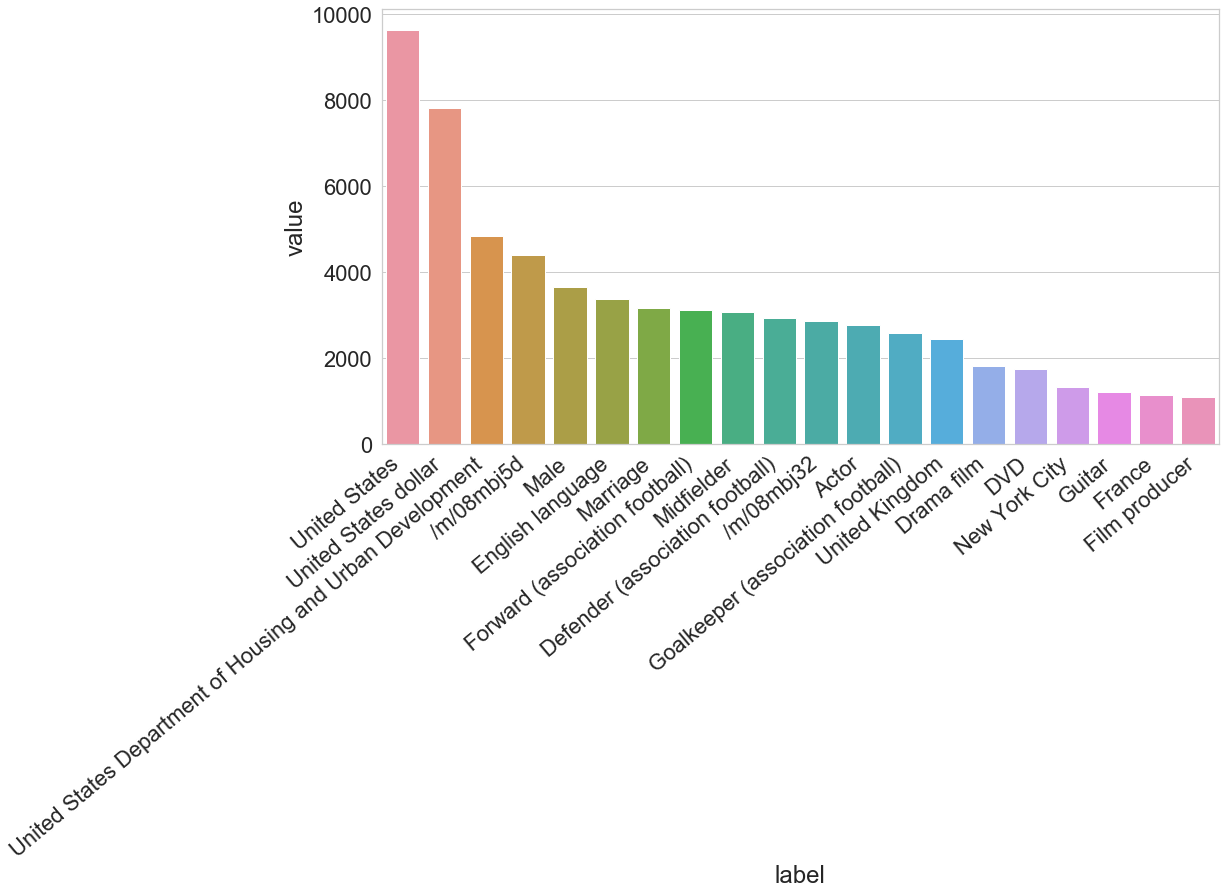

In [71]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.barplot(x="label", y="value", data=object_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('FB15k_Object_Counts.png', bbox_inches = "tight", format='PNG')

In [72]:
object_counts.count(), object_counts.max(), object_counts.min(), object_counts.median()

(label    14930
 value    14930
 dtype: int64, label    İzmir
 value     9645
 dtype: object, label    'N Sync
 value          1
 dtype: object, value    23.0
 dtype: float64)

In [73]:
# Computing IQR
Q1 = object_counts.quantile(0.25)
Q3 = object_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    30.0
dtype: float64

In [74]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
/m/08mbj5d,4381
Marriage,3682
/m/08mbj32,2867
Actor,2769
United States,2318


In [44]:
subject_counts.index

Index(['/m/08mbj5d', 'Marriage', '/m/08mbj32', 'Actor', 'United States',
       'Drama film', 'Forward (association football)', 'Midfielder',
       'Defender (association football)', 'Goalkeeper (association football)',
       ...
       'Vagrant Records', 'Valine', 'K-pop',
       'Order of St Michael and St George', 'Sexploitation film', 'Samurai',
       'Renaissance architecture', 'Curator', 'Mathcore', 'Basra'],
      dtype='object', length=14865)

In [75]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,/m/08mbj5d,4381
1,Marriage,3682
2,/m/08mbj32,2867
3,Actor,2769
4,United States,2318


In [76]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,/m/08mbj5d,4381
1,Marriage,3682
2,/m/08mbj32,2867
3,Actor,2769
4,United States,2318


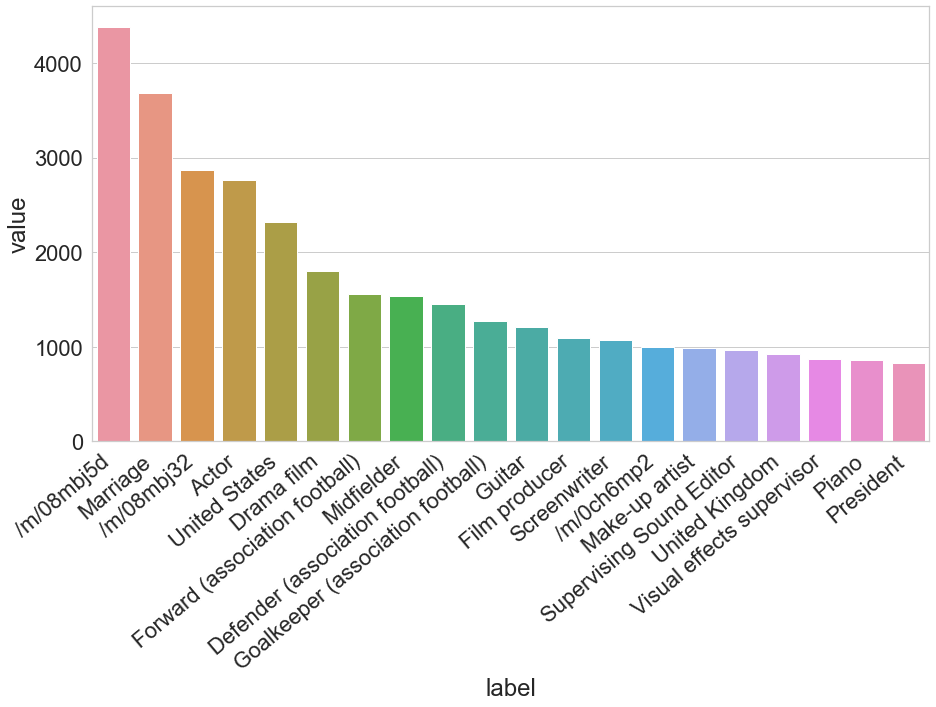

In [79]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.barplot(x="label", y="value", data=subject_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('FB15k_Subject_Counts.png', bbox_inches = "tight", format='PNG')